In [1]:
# 1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке 
# принципов.

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для модели возьму первые два признака
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

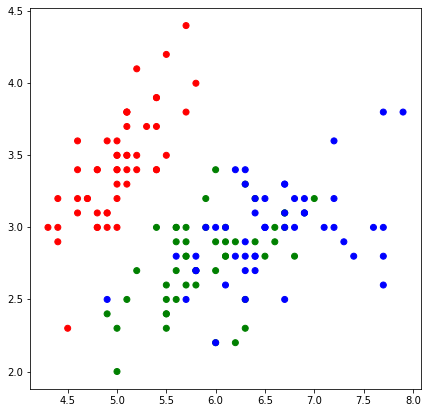

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [5]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [6]:
{class_item: 0 for class_item in set(y_train)}

{0: 0, 1: 0, 2: 0}

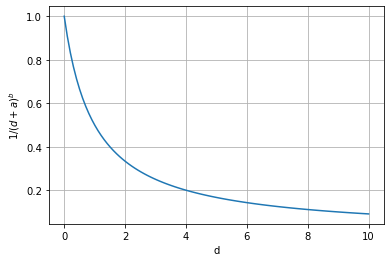

In [7]:
dots = np.linspace(0, 10, 100)
a = 1
value = list(map(lambda d: 1/(d + a), dots))

plt.xlabel('d')
plt.ylabel('$1/(d + a)^b$')
plt.grid()
plt.plot(dots, value);

In [8]:
value

[1.0,
 0.908256880733945,
 0.8319327731092437,
 0.7674418604651163,
 0.7122302158273381,
 0.6644295302013422,
 0.6226415094339623,
 0.5857988165680473,
 0.553072625698324,
 0.5238095238095238,
 0.4974874371859296,
 0.47368421052631576,
 0.452054794520548,
 0.43231441048034935,
 0.4142259414225941,
 0.39759036144578314,
 0.38223938223938225,
 0.3680297397769517,
 0.3548387096774193,
 0.342560553633218,
 0.3311036789297659,
 0.32038834951456313,
 0.3103448275862069,
 0.3009118541033435,
 0.2920353982300885,
 0.2836676217765043,
 0.2757660167130919,
 0.2682926829268293,
 0.2612137203166227,
 0.2544987146529563,
 0.2481203007518797,
 0.24205378973105132,
 0.2362768496420048,
 0.23076923076923073,
 0.2255125284738041,
 0.22048997772828507,
 0.2156862745098039,
 0.21108742004264394,
 0.20668058455114824,
 0.20245398773006135,
 0.19839679358717432,
 0.1944990176817289,
 0.19075144508670522,
 0.18714555765595464,
 0.18367346938775508,
 0.18032786885245902,
 0.17710196779964224,
 0.173989455184

In [13]:
def knn(x_train, y_train, x_test, k, weights=None):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # Расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Запись в список значения расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # Словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортировка списка, подсчет частоты появления разных классов среди первых k элементов 
        for i, d in enumerate(sorted(test_distances)[0:k]):
            w = weights(i, d[0]) if weights else 1
            classes[d[1]] += w

        # Список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [14]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [15]:
k = 10

%time y_pred_train = knn(X_train, y_train, X_train, k)
%time y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма на трейне при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тесте при k = {k}: {accuracy(y_pred, y_test):.3f}')

Wall time: 106 ms
Wall time: 29.1 ms
Точность алгоритма на трейне при k = 10: 0.842
Точность алгоритма на тесте при k = 10: 0.767


In [16]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .1

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

(2352, 2)


<ipython-input-16-149519eff5db>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


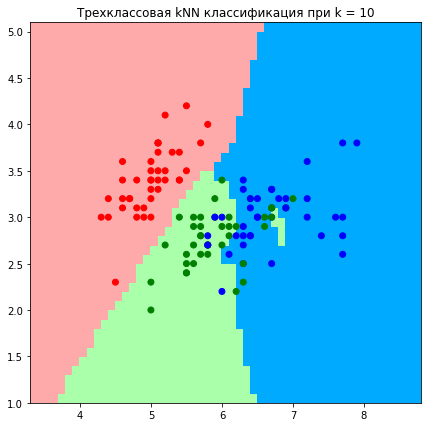

Wall time: 2.2 s


In [17]:
%%time
get_graph(X_train, y_train, k)

In [18]:
x = np.zeros((2000))
y = np.zeros((2000))
y[2] = 100

e_metrics(x, y)

100.0

In [19]:
x = np.zeros((2000))
z = np.ones((2000))
e_metrics(x, z)

44.721359549995796

In [20]:
# 2. *Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить 
# график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, 
# как в методичке).

from sklearn.datasets import make_blobs
import numpy as np

X, y = make_blobs(n_samples=100, random_state=1)

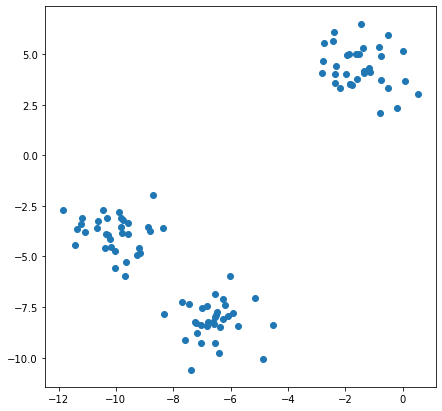

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

In [22]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [23]:
def kmeans(data, k, max_iterations, min_distance):
    # Словарь для кластеризации
    clusters = {i: [] for i in range(k)}
    
    # Инициализация центроидов как первых k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # Кластеризация объекты по центроидам
        for x in data:
            # Определение расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # Отнесение объект к кластеру, до центроида которого наименьшее расстояние
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)
        
        # Сохранение предыдущих центроидов в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # Пересчет центроидов как среднего по кластерам
        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)
            
        # Сравнение величины смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break
        
        # Если все смещения меньше минимального, остановка алгоритма  
        if optimal:
            break
    
    return old_centroids, clusters

In [24]:
def visualize(centroids, clusters):
    colors = ['r', 'g', 'b', 'orange', 'y', 'sienna', 'darkcyan', 'purple', 'gray', 'indigo']
    
    plt.figure(figsize=(7,7))
    
    # Центроиды на графике
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # Объекты раскрашенные по классам
    for cluster_item in clusters:
        for x in clusters[cluster_item]:
            plt.scatter(x[0], x[1], color=colors[cluster_item])
            
    plt.show()

In [26]:
# Максимальное количество итераций
max_iterations = 5

# Минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# Количество кластеров
k = 3

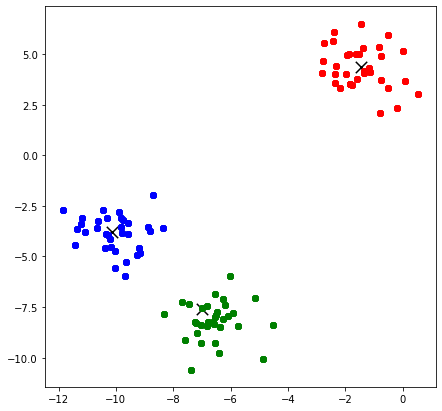

In [27]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [28]:
def mean_square_cluster_cohesion(clusters, centroids):
    mscc = 0
    for cluster, data in clusters.items():
        dist = 0
        for x in data:
            dist += e_metrics(centroids[cluster], x) ** 2
        dist /= len(data)
        mscc += dist
    return mscc

In [29]:
from tqdm import tqdm

n_clusters = range(1, 11)
errors = []

for k in tqdm(n_clusters):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    errors.append(mean_square_cluster_cohesion(clusters, centroids))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 40.24it/s]


Text(0, 0.5, 'Внутрикластерное расстояние')

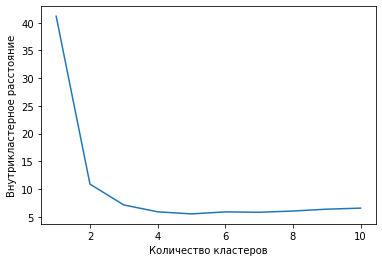

In [30]:
plt.plot(n_clusters, errors)
plt.xlabel('Количество кластеров')
plt.ylabel('Внутрикластерное расстояние')